# All Data Models

1. Train the PCA models

        This results in pickled PCA models.
        
2. Train autoencoder models (as replacement for PCA)

        This results in saved autoencoder models.
        
3. Train a k-means cluster that sits on top of PCA & autoencoder

        This results in pickled k-means models.

## LOAD

In [1]:
task_name = 'all_data'

In [2]:
model_path = './models/{0}/'.format(task_name)

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import pickle

from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train = pd.read_csv(save_train_path)
Test = pd.read_csv(save_test_path)
Valid = pd.read_csv(save_valid_path)

In [5]:
X = np.asarray(Train.to_numpy()[:,3:]).astype('float32')

In [6]:
del Train

In [7]:
Xtest = np.asarray(Test.to_numpy()[:,3:]).astype('float32')

In [8]:
del Test

In [9]:
Xvalid = np.asarray(Valid.to_numpy()[:,3:]).astype('float32')

In [10]:
del Valid

## PCA Fit
I found 32 components to be roughly the inflection curve.
I am also creating an 18  component variant just in case we want a direct comparison with action units

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca_n_32 = PCA(n_components=32)
face_pca_n_32 = pca_n_32.fit(X)

print(face_pca_n_32.explained_variance_)

[3.02898280e+06 1.48192985e+06 8.50408697e+04 3.55503803e+04
 1.42465207e+04 1.00788078e+04 8.03081786e+03 2.93665604e+03
 1.74589976e+03 1.00896830e+03 7.85833858e+02 6.95647183e+02
 5.76001481e+02 4.85647584e+02 3.70484387e+02 3.13074567e+02
 2.23914548e+02 1.90445931e+02 1.61881174e+02 1.55147901e+02
 1.42459612e+02 1.08798510e+02 9.41354586e+01 7.94734513e+01
 7.24062832e+01 6.16170017e+01 5.54279534e+01 4.92837016e+01
 4.52762860e+01 3.86788726e+01 3.17843279e+01 2.72607169e+01]


In [13]:
pickle.dump(face_pca_n_32,open(model_path+'pca_n_32.p','wb'))

In [14]:
pca_n_18 = PCA(n_components=18)
face_pca_n_18 = pca_n_18.fit(X)

print(face_pca_n_18.explained_variance_)

[3.02898391e+06 1.48192875e+06 8.50409329e+04 3.55503917e+04
 1.42465537e+04 1.00788114e+04 8.03082720e+03 2.93666053e+03
 1.74590084e+03 1.00896758e+03 7.85834127e+02 6.95647677e+02
 5.76001167e+02 4.85647674e+02 3.70484566e+02 3.13074477e+02
 2.23914212e+02 1.90445819e+02]


In [15]:
pickle.dump(face_pca_n_18,open(model_path+'pca_n_18.p','wb'))

# Autoencoder
Right now just doing a single layer 
Perhaps we can try a two layer encoder / two layer decoder next?

32 Wide encoder

In [16]:
import keras
from keras import layers

In [17]:
print(X.shape)

(712824, 136)


In [18]:
input_dim = X.shape[1]
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_32 = keras.Model(input_layer,decoded_layer)

encoder_32 = keras.Model(input_layer, encoded_layer)

In [19]:
autoencoder_32.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [20]:
autoencoder_32.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 136)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                4384      
_________________________________________________________________
dense_1 (Dense)              (None, 136)               4488      
Total params: 8,872
Trainable params: 8,872
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = autoencoder_32.fit(X, X, epochs=2, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))

Epoch 1/2
11138/11138 [==============================] - 27s 2ms/step - loss: -6594.5979 - val_loss: -7894.4731
Epoch 2/2
11138/11138 [==============================] - 26s 2ms/step - loss: -7895.8183 - val_loss: -7895.5244


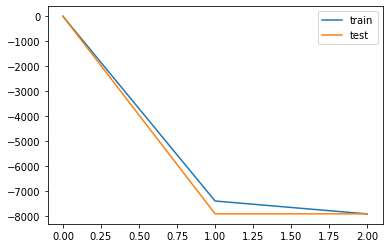

In [22]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [23]:
predictions = autoencoder_32.predict(Xvalid)
# TODO I should probably do something with the validation set

In [24]:
autoencoder_32.save(model_path + 'autoencoder_32.h5', save_format='h5')
encoder_32.save(model_path + 'encoder_32.h5', save_format='h5')

18 wide encoder

In [25]:
import keras
from keras import layers

In [26]:
input_dim = X.shape[1]
encoding_dim = 18

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_18 = keras.Model(input_layer,decoded_layer)

encoder_18 = keras.Model(input_layer, encoded_layer)

In [27]:
autoencoder_18.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [28]:
autoencoder_18.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 136)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                2466      
_________________________________________________________________
dense_3 (Dense)              (None, 136)               2584      
Total params: 5,050
Trainable params: 5,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = autoencoder_18.fit(X, X, epochs=2, batch_size=64, verbose=0, validation_data=(Xtest, Xtest))

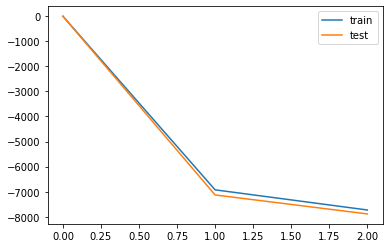

In [30]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
predictions = autoencoder_18.predict(Xvalid)
# TODO I should probably do something with the validation set

In [32]:
autoencoder_18.save(model_path + 'autoencoder_18.h5', save_format='h5')
encoder_18.save(model_path + 'encoder_18.h5', save_format='h5')

## K-means
Not sure what this is going to do 
(my guess is it is going to cluster similar participants)

In [33]:
from sklearn.cluster import KMeans

In [34]:
def visualize_labels(y):
    idx = np.arange(len(y))

    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)

    ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto")
    ax1.set_yticks([])

    ax2.scatter(idx,y)

    plt.tight_layout()
    plt.show()

In [35]:
face_pca_n_32 = pickle.load(open(model_path+'pca_n_32.p','rb'))

X_pca = face_pca_n_32.transform(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_pca)

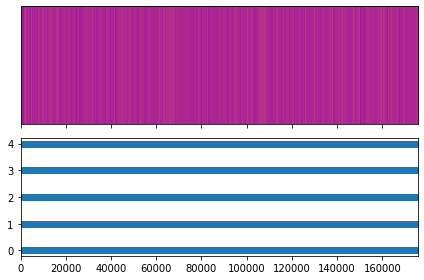

In [36]:
y = kmeans_5.predict(face_pca_n_32.transform(Xtest))
visualize_labels(y)

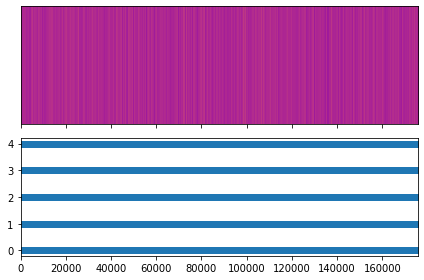

In [37]:
y = kmeans_5.predict(face_pca_n_32.transform(Xvalid))
visualize_labels(y)

In [38]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_pca.p','wb'))

In [39]:
encoder_32 = keras.models.load_model(model_path + 'encoder_32.h5')

X_auto = encoder_32.predict(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_auto)

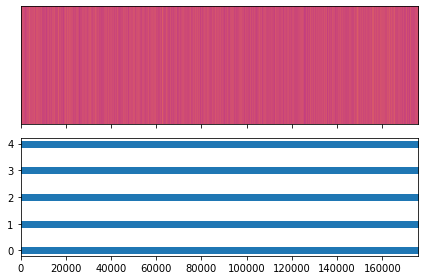

In [40]:
y = kmeans_5.predict(encoder_32.predict(Xtest))
visualize_labels(y)

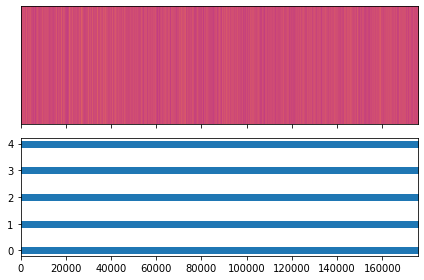

In [41]:
y = kmeans_5.predict(encoder_32.predict(Xvalid))
visualize_labels(y)

In [42]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_auto.p','wb'))